In [1]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle CDC "Rare Diseases" data
#
##########################################################################################

In [2]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_XML_RareDiseases_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Submit completed work via GitHub pull request
#
##################################################################################################################


--2019-09-15 12:33:23--  https://data.cdc.gov/api/views/dwqk-w36f/rows.xml
Resolving data.cdc.gov (data.cdc.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cdc.gov (data.cdc.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/xml]
Saving to: ‘rows.xml’

rows.xml                [         <=>        ]   2.29M  1007KB/s    in 2.3s    

2019-09-15 12:33:26 (1007 KB/s) - ‘rows.xml’ saved [2398754]



## Get Data data.gov

Data available at https://data.cdc.gov/api/views/45b4-9j7u/rows.xml



In [3]:
# Download with:
# Info: 
#     https://data.cdc.gov/NNDSS/NNDSS-Table-I-infrequently-reported-notifiable-dis/45b4-9j7u
#


! wget https://data.cdc.gov/api/views/45b4-9j7u/rows.xml
! mv rows.xml Data/


'wget' is not recognized as an internal or external command,
operable program or batch file.
'mv' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
import numpy as np
import pandas as pd
import pylab as plt
from collections import Counter
%matplotlib notebook

#import xml.etree.ElementTree as ET
from lxml import etree as ET

In [7]:
# Adapted from:  https://python-forum.io/Thread-How-to-display-XML-tree-structure-with-Python

def xml_tree_vis(filename):
    import re, collections
    from lxml import etree as ET

    raw_tree = ET.parse(filename)
    xml_root = raw_tree.getroot()      # the top-most node
    nice_tree = collections.OrderedDict()

    for tag in xml_root.iter():
        path = re.sub('\[[0-9]+\]', '', raw_tree.getpath(tag))
        if path not in nice_tree:
            nice_tree[path] = []
        if len(tag.keys()) > 0:
            nice_tree[path].extend(attrib for attrib in tag.keys() if attrib not in nice_tree[path])            

    for path, attribs in nice_tree.items():
        indent = int(path.count('/') - 1)
        nodename = path.split('/')[-1]
        if len(attribs) > 0:
            attribslist =  ', '.join(attribs)  
        else:
            attribslist = '-'
            
        print('{0}{1}: {2} [{3}]'.format('    ' * indent, indent, nodename, attribslist))
        
# Visualize this file's structure
xml_tree_vis('../Data/rows.xml')

0: response [-]
    1: row [-]
        2: row [_id, _uuid, _position, _address]
            3: disease [-]
            3: mmwr_year [-]
            3: mmwr_week [-]
            3: current_week_flag [-]
            3: cum_2017_flag [-]
            3: _5_year_weekly_average_flag [-]
            3: total_cases_reported_2016_flag [-]
            3: total_cases_reported_2015_flag [-]
            3: total_cases_reported_2014_flag [-]
            3: total_cases_reported_2013_flag [-]
            3: total_cases_reported_2012_flag [-]
            3: _5_year_weekly_average [-]
            3: total_cases_reported_2016 [-]
            3: total_cases_reported_2015 [-]
            3: total_cases_reported_2014 [-]
            3: total_cases_reported_2013 [-]
            3: total_cases_reported_2012 [-]
            3: current_week [-]
            3: cum_2017 [-]
            3: states_reporting_cases_during_current_week_no [-]


In [8]:
# Notice there are two levels with the tag "row"  This sort of thing is common in 
# XML and really annoying.  
# This sort of display makes it stand out, though.
# We'll need to remember that for later.

In [10]:

#  Read the entire tree into a collection of "nodes"
#  each of which have several associated attributes,
#  possibly including other "child nodes"
#
#  Web browsers can display XML in a relatively
#  easy-to-read way.  Open rows.xml with your browser.

# Open the file in Python: 
tree = ET.parse('../Data/rows.xml')
root = tree.getroot()      # the top-most node


In [11]:
# This data seems to be organized by an attribute called "row", each of 
#  which has several children (probably the columns)

In [12]:
# You can see root's child nodes with

for xx in root.iter():
    print(xx)

# This shows all of the children of root, without regard to their position in the tree.
# In this data set, though, we want to parse each row separately.


<Element response at 0x14e70b14908>
<Element row at 0x14e017d80c8>
<Element row at 0x14e70b14208>
<Element disease at 0x14e01694788>
<Element mmwr_year at 0x14e017d80c8>
<Element mmwr_week at 0x14e70b14208>
<Element current_week_flag at 0x14e01694188>
<Element cum_2017_flag at 0x14e01690248>
<Element _5_year_weekly_average_flag at 0x14e70b14208>
<Element total_cases_reported_2016_flag at 0x14e01694188>
<Element total_cases_reported_2015_flag at 0x14e01690248>
<Element total_cases_reported_2014_flag at 0x14e70b14208>
<Element total_cases_reported_2013_flag at 0x14e017d80c8>
<Element total_cases_reported_2012_flag at 0x14e01690248>
<Element row at 0x14e70b14208>
<Element disease at 0x14e017d80c8>
<Element mmwr_year at 0x14e01690248>
<Element mmwr_week at 0x14e70b14208>
<Element current_week_flag at 0x14e01694188>
<Element cum_2017_flag at 0x14e017d80c8>
<Element _5_year_weekly_average at 0x14e70b14208>
<Element total_cases_reported_2016 at 0x14e01694188>
<Element total_cases_reported_201

<Element total_cases_reported_2014 at 0x14e017d80c8>
<Element total_cases_reported_2013 at 0x14e01632308>
<Element total_cases_reported_2012 at 0x14e01690248>
<Element row at 0x14e017d80c8>
<Element disease at 0x14e01632308>
<Element mmwr_year at 0x14e01690248>
<Element mmwr_week at 0x14e017d80c8>
<Element current_week_flag at 0x14e0162db88>
<Element cum_2017 at 0x14e01632308>
<Element _5_year_weekly_average at 0x14e017d80c8>
<Element total_cases_reported_2016 at 0x14e01690248>
<Element total_cases_reported_2015 at 0x14e01632308>
<Element total_cases_reported_2014 at 0x14e017d80c8>
<Element total_cases_reported_2013 at 0x14e01690248>
<Element total_cases_reported_2012 at 0x14e01632308>
<Element row at 0x14e017d80c8>
<Element disease at 0x14e01690248>
<Element mmwr_year at 0x14e01632308>
<Element mmwr_week at 0x14e017d80c8>
<Element current_week at 0x14e0162db88>
<Element cum_2017 at 0x14e01690248>
<Element _5_year_weekly_average at 0x14e01632308>
<Element total_cases_reported_2016 at 0

<Element states_reporting_cases_during_current_week_no at 0x14e01690248>
<Element row at 0x14e01632308>
<Element disease at 0x14e70b14208>
<Element mmwr_year at 0x14e01690248>
<Element mmwr_week at 0x14e01632308>
<Element current_week_flag at 0x14e01694848>
<Element cum_2017 at 0x14e70b14208>
<Element _5_year_weekly_average at 0x14e01632308>
<Element total_cases_reported_2016 at 0x14e01694848>
<Element total_cases_reported_2015 at 0x14e70b14208>
<Element total_cases_reported_2014 at 0x14e01632308>
<Element total_cases_reported_2013 at 0x14e01690248>
<Element total_cases_reported_2012 at 0x14e70b14208>
<Element row at 0x14e01632308>
<Element disease at 0x14e01690248>
<Element mmwr_year at 0x14e70b14208>
<Element mmwr_week at 0x14e01632308>
<Element current_week_flag at 0x14e01694848>
<Element cum_2017 at 0x14e01690248>
<Element _5_year_weekly_average at 0x14e01632308>
<Element total_cases_reported_2016 at 0x14e01694848>
<Element total_cases_reported_2015 at 0x14e01690248>
<Element total

<Element row at 0x14e70b14208>
<Element disease at 0x14e017d80c8>
<Element mmwr_year at 0x14e01632308>
<Element mmwr_week at 0x14e70b14208>
<Element current_week_flag at 0x14e0162db88>
<Element cum_2017_flag at 0x14e017d80c8>
<Element _5_year_weekly_average_flag at 0x14e70b14208>
<Element total_cases_reported_2016_flag at 0x14e01632308>
<Element total_cases_reported_2015_flag at 0x14e017d80c8>
<Element total_cases_reported_2014_flag at 0x14e70b14208>
<Element total_cases_reported_2013_flag at 0x14e01632308>
<Element total_cases_reported_2012_flag at 0x14e017d80c8>
<Element row at 0x14e70b14208>
<Element disease at 0x14e01632308>
<Element mmwr_year at 0x14e017d80c8>
<Element mmwr_week at 0x14e70b14208>
<Element current_week_flag at 0x14e0162db88>
<Element cum_2017_flag at 0x14e01632308>
<Element _5_year_weekly_average_flag at 0x14e70b14208>
<Element total_cases_reported_2016_flag at 0x14e017d80c8>
<Element total_cases_reported_2015_flag at 0x14e01632308>
<Element total_cases_reported_20

<Element mmwr_year at 0x14e01632308>
<Element mmwr_week at 0x14e70b14208>
<Element current_week_flag at 0x14e01690248>
<Element cum_2017_flag at 0x14e017d80c8>
<Element _5_year_weekly_average_flag at 0x14e70b14208>
<Element total_cases_reported_2016_flag at 0x14e016943c8>
<Element total_cases_reported_2015_flag at 0x14e017d80c8>
<Element total_cases_reported_2014_flag at 0x14e70b14208>
<Element total_cases_reported_2013_flag at 0x14e016943c8>
<Element total_cases_reported_2012_flag at 0x14e017d80c8>
<Element row at 0x14e70b14208>
<Element disease at 0x14e01632308>
<Element mmwr_year at 0x14e017d80c8>
<Element mmwr_week at 0x14e70b14208>
<Element current_week_flag at 0x14e016943c8>
<Element cum_2017_flag at 0x14e01632308>
<Element _5_year_weekly_average at 0x14e70b14208>
<Element total_cases_reported_2016 at 0x14e017d80c8>
<Element total_cases_reported_2015 at 0x14e01632308>
<Element total_cases_reported_2014 at 0x14e70b14208>
<Element total_cases_reported_2013 at 0x14e017d80c8>
<Elemen

<Element _5_year_weekly_average_flag at 0x14e01632308>
<Element total_cases_reported_2016_flag at 0x14e0162db88>
<Element total_cases_reported_2015_flag at 0x14e017d80c8>
<Element total_cases_reported_2014_flag at 0x14e01632308>
<Element total_cases_reported_2013_flag at 0x14e0162db88>
<Element total_cases_reported_2012_flag at 0x14e01690248>
<Element row at 0x14e01632308>
<Element disease at 0x14e0162db88>
<Element mmwr_year at 0x14e01690248>
<Element mmwr_week at 0x14e01632308>
<Element current_week_flag at 0x14e0180e308>
<Element cum_2017_flag at 0x14e0162db88>
<Element _5_year_weekly_average_flag at 0x14e017d80c8>
<Element total_cases_reported_2016 at 0x14e01690248>
<Element total_cases_reported_2015 at 0x14e0162db88>
<Element total_cases_reported_2014 at 0x14e017d80c8>
<Element total_cases_reported_2013 at 0x14e01690248>
<Element total_cases_reported_2012 at 0x14e0162db88>
<Element row at 0x14e017d80c8>
<Element disease at 0x14e01690248>
<Element mmwr_year at 0x14e0162db88>
<Eleme

<Element states_reporting_cases_during_current_week_no at 0x14e01690248>
<Element row at 0x14e017d80c8>
<Element disease at 0x14e70b14208>
<Element mmwr_year at 0x14e01690248>
<Element mmwr_week at 0x14e017d80c8>
<Element current_week_flag at 0x14e0180e308>
<Element cum_2017_flag at 0x14e70b14208>
<Element _5_year_weekly_average_flag at 0x14e017d80c8>
<Element total_cases_reported_2016_flag at 0x14e0180e308>
<Element total_cases_reported_2015_flag at 0x14e70b14208>
<Element total_cases_reported_2014_flag at 0x14e017d80c8>
<Element total_cases_reported_2013_flag at 0x14e01690248>
<Element total_cases_reported_2012_flag at 0x14e70b14208>
<Element row at 0x14e017d80c8>
<Element disease at 0x14e01690248>
<Element mmwr_year at 0x14e70b14208>
<Element mmwr_week at 0x14e017d80c8>
<Element current_week_flag at 0x14e0180e308>
<Element cum_2017_flag at 0x14e01690248>
<Element _5_year_weekly_average_flag at 0x14e017d80c8>
<Element total_cases_reported_2016_flag at 0x14e0180e308>
<Element total_ca

<Element total_cases_reported_2016 at 0x14e0180e308>
<Element total_cases_reported_2015 at 0x14e0162db88>
<Element total_cases_reported_2014_flag at 0x14e70b14208>
<Element total_cases_reported_2013_flag at 0x14e017d80c8>
<Element total_cases_reported_2012_flag at 0x14e0162db88>
<Element row at 0x14e70b14208>
<Element disease at 0x14e017d80c8>
<Element row at 0x14e0162db88>
<Element disease at 0x14e70b14208>
<Element mmwr_year at 0x14e017d80c8>
<Element mmwr_week at 0x14e0162db88>
<Element current_week at 0x14e0180ec08>
<Element cum_2017 at 0x14e70b14208>
<Element _5_year_weekly_average at 0x14e017d80c8>
<Element total_cases_reported_2016 at 0x14e0180ec08>
<Element total_cases_reported_2015 at 0x14e70b14208>
<Element total_cases_reported_2014 at 0x14e017d80c8>
<Element total_cases_reported_2013 at 0x14e0162db88>
<Element total_cases_reported_2012 at 0x14e70b14208>
<Element states_reporting_cases_during_current_week_no at 0x14e017d80c8>
<Element row at 0x14e0162db88>
<Element disease at

<Element row at 0x14e017d80c8>
<Element disease at 0x14e0162db88>
<Element mmwr_year at 0x14e70b14208>
<Element mmwr_week at 0x14e017d80c8>
<Element current_week_flag at 0x14e0180ec08>
<Element cum_2017 at 0x14e0162db88>
<Element _5_year_weekly_average at 0x14e017d80c8>
<Element total_cases_reported_2016 at 0x14e0180ec08>
<Element total_cases_reported_2015 at 0x14e0162db88>
<Element total_cases_reported_2014 at 0x14e017d80c8>
<Element total_cases_reported_2013 at 0x14e70b14208>
<Element total_cases_reported_2012 at 0x14e0162db88>
<Element row at 0x14e017d80c8>
<Element disease at 0x14e70b14208>
<Element mmwr_year at 0x14e0162db88>
<Element mmwr_week at 0x14e017d80c8>
<Element current_week at 0x14e0180ec08>
<Element cum_2017 at 0x14e01690248>
<Element _5_year_weekly_average at 0x14e0162db88>
<Element total_cases_reported_2016 at 0x14e0180ec08>
<Element total_cases_reported_2015 at 0x14e01690248>
<Element total_cases_reported_2014 at 0x14e0162db88>
<Element total_cases_reported_2013 at 0

<Element total_cases_reported_2016 at 0x14e0180ec08>
<Element total_cases_reported_2015 at 0x14e0162db88>
<Element total_cases_reported_2014 at 0x14e017d80c8>
<Element total_cases_reported_2013 at 0x14e0180ec08>
<Element total_cases_reported_2012 at 0x14e0162db88>
<Element row at 0x14e017d80c8>
<Element disease at 0x14e0180ec08>
<Element mmwr_year at 0x14e0162db88>
<Element mmwr_week at 0x14e017d80c8>
<Element current_week_flag at 0x14e0180edc8>
<Element cum_2017_flag at 0x14e0180ec08>
<Element _5_year_weekly_average_flag at 0x14e017d80c8>
<Element total_cases_reported_2016_flag at 0x14e0180edc8>
<Element total_cases_reported_2015_flag at 0x14e0162db88>
<Element total_cases_reported_2014_flag at 0x14e017d80c8>
<Element total_cases_reported_2013_flag at 0x14e0180edc8>
<Element total_cases_reported_2012_flag at 0x14e0162db88>
<Element row at 0x14e017d80c8>
<Element disease at 0x14e0180edc8>
<Element mmwr_year at 0x14e0162db88>
<Element mmwr_week at 0x14e017d80c8>
<Element current_week_fl

<Element total_cases_reported_2014 at 0x14e0162db88>
<Element total_cases_reported_2013 at 0x14e0180edc8>
<Element total_cases_reported_2012 at 0x14e01690248>
<Element row at 0x14e0162db88>
<Element disease at 0x14e0180edc8>
<Element mmwr_year at 0x14e01690248>
<Element mmwr_week at 0x14e0162db88>
<Element current_week_flag at 0x14e0180ef08>
<Element cum_2017_flag at 0x14e0180edc8>
<Element _5_year_weekly_average_flag at 0x14e0162db88>
<Element total_cases_reported_2016_flag at 0x14e0180ef08>
<Element total_cases_reported_2015_flag at 0x14e01690248>
<Element total_cases_reported_2014_flag at 0x14e0162db88>
<Element total_cases_reported_2013_flag at 0x14e0180ef08>
<Element total_cases_reported_2012_flag at 0x14e01690248>
<Element row at 0x14e0162db88>
<Element disease at 0x14e0180ef08>
<Element mmwr_year at 0x14e01690248>
<Element mmwr_week at 0x14e0162db88>
<Element current_week_flag at 0x14e0180edc8>
<Element cum_2017 at 0x14e0180ef08>
<Element _5_year_weekly_average at 0x14e0162db88>

<Element _5_year_weekly_average at 0x14e0162db88>
<Element total_cases_reported_2016 at 0x14e017d80c8>
<Element total_cases_reported_2015 at 0x14e01690248>
<Element total_cases_reported_2014 at 0x14e0162db88>
<Element total_cases_reported_2013 at 0x14e017d80c8>
<Element total_cases_reported_2012 at 0x14e01690248>
<Element states_reporting_cases_during_current_week_no at 0x14e0162db88>
<Element row at 0x14e017d80c8>
<Element disease at 0x14e01690248>
<Element mmwr_year at 0x14e0162db88>
<Element mmwr_week at 0x14e017d80c8>
<Element current_week_flag at 0x14e0180ef08>
<Element cum_2017_flag at 0x14e01690248>
<Element _5_year_weekly_average_flag at 0x14e017d80c8>
<Element total_cases_reported_2016_flag at 0x14e0180ef08>
<Element total_cases_reported_2015_flag at 0x14e01690248>
<Element total_cases_reported_2014_flag at 0x14e017d80c8>
<Element total_cases_reported_2013_flag at 0x14e0162db88>
<Element total_cases_reported_2012_flag at 0x14e01690248>
<Element row at 0x14e017d80c8>
<Element d

<Element mmwr_week at 0x14e0162db88>
<Element current_week at 0x14e0180ef08>
<Element cum_2017 at 0x14e0180edc8>
<Element _5_year_weekly_average at 0x14e01690248>
<Element total_cases_reported_2016 at 0x14e0180ef08>
<Element total_cases_reported_2015 at 0x14e0162db88>
<Element total_cases_reported_2014 at 0x14e01690248>
<Element total_cases_reported_2013 at 0x14e0180ef08>
<Element total_cases_reported_2012 at 0x14e0162db88>
<Element states_reporting_cases_during_current_week_no at 0x14e01690248>
<Element row at 0x14e0180ef08>
<Element disease at 0x14e0162db88>
<Element mmwr_year at 0x14e01690248>
<Element mmwr_week at 0x14e0180ef08>
<Element current_week_flag at 0x14e0180ec08>
<Element cum_2017_flag at 0x14e0162db88>
<Element _5_year_weekly_average_flag at 0x14e01690248>
<Element total_cases_reported_2016_flag at 0x14e0180ef08>
<Element total_cases_reported_2015_flag at 0x14e0162db88>
<Element total_cases_reported_2014_flag at 0x14e01690248>
<Element total_cases_reported_2013_flag at 0

<Element disease at 0x14e0180ec08>
<Element mmwr_year at 0x14e017d80c8>
<Element mmwr_week at 0x14e01690248>
<Element current_week_flag at 0x14e0180ee48>
<Element cum_2017_flag at 0x14e0180ec08>
<Element _5_year_weekly_average_flag at 0x14e01690248>
<Element total_cases_reported_2016_flag at 0x14e0180ee48>
<Element total_cases_reported_2015_flag at 0x14e017d80c8>
<Element total_cases_reported_2014_flag at 0x14e01690248>
<Element total_cases_reported_2013_flag at 0x14e0180ee48>
<Element total_cases_reported_2012_flag at 0x14e017d80c8>
<Element row at 0x14e01690248>
<Element disease at 0x14e0180ee48>
<Element mmwr_year at 0x14e017d80c8>
<Element mmwr_week at 0x14e01690248>
<Element current_week_flag at 0x14e0180ec08>
<Element cum_2017 at 0x14e0180ee48>
<Element _5_year_weekly_average at 0x14e01690248>
<Element total_cases_reported_2016 at 0x14e0180ec08>
<Element total_cases_reported_2015 at 0x14e017d80c8>
<Element total_cases_reported_2014 at 0x14e01690248>
<Element total_cases_reported_

<Element total_cases_reported_2013 at 0x14e0180ec08>
<Element total_cases_reported_2012 at 0x14e01690248>
<Element row at 0x14e0162db88>
<Element disease at 0x14e0180ec08>
<Element mmwr_year at 0x14e01690248>
<Element mmwr_week at 0x14e0162db88>
<Element current_week_flag at 0x14e0180ed08>
<Element cum_2017_flag at 0x14e0180ec08>
<Element _5_year_weekly_average_flag at 0x14e0162db88>
<Element total_cases_reported_2016_flag at 0x14e0180ed08>
<Element total_cases_reported_2015_flag at 0x14e01690248>
<Element total_cases_reported_2014_flag at 0x14e0162db88>
<Element total_cases_reported_2013_flag at 0x14e0180ed08>
<Element total_cases_reported_2012_flag at 0x14e01690248>
<Element row at 0x14e0162db88>
<Element disease at 0x14e0180ed08>
<Element mmwr_year at 0x14e01690248>
<Element mmwr_week at 0x14e0162db88>
<Element current_week at 0x14e0180ec08>
<Element cum_2017 at 0x14e0180ed08>
<Element _5_year_weekly_average at 0x14e01690248>
<Element total_cases_reported_2016 at 0x14e0180ec08>
<Ele

<Element cum_2017_flag at 0x14e0180ed08>
<Element _5_year_weekly_average at 0x14e017d80c8>
<Element total_cases_reported_2016 at 0x14e0180ee48>
<Element total_cases_reported_2015 at 0x14e0180ed08>
<Element total_cases_reported_2014_flag at 0x14e017d80c8>
<Element total_cases_reported_2013_flag at 0x14e0180ee48>
<Element total_cases_reported_2012_flag at 0x14e0180ed08>
<Element row at 0x14e017d80c8>
<Element disease at 0x14e0180ee48>
<Element mmwr_year at 0x14e0180ed08>
<Element mmwr_week at 0x14e017d80c8>
<Element current_week_flag at 0x14e0180ec08>
<Element cum_2017 at 0x14e0180ee48>
<Element _5_year_weekly_average at 0x14e017d80c8>
<Element total_cases_reported_2016 at 0x14e0180ed08>
<Element total_cases_reported_2015 at 0x14e0180ee48>
<Element total_cases_reported_2014 at 0x14e017d80c8>
<Element total_cases_reported_2013 at 0x14e0180ed08>
<Element total_cases_reported_2012 at 0x14e0180ee48>
<Element row at 0x14e017d80c8>
<Element disease at 0x14e0180ed08>
<Element mmwr_year at 0x14e

In [13]:
## Here's how you iterate through only the nodes called "row"
for xx in root.iter('row'):
    print(xx)


<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e01690c08>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e01690c08>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e01690c08>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e01690c08>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e01690c08>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e01690c08>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e01690c08>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e01690c08>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e01690c08>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e01690c08>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element

<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e016944c8>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e016944c8>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e016944c8>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e016944c8>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e016944c8>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e016944c8>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e016944c8>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e016944c8>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e016944c8>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element row at 0x14e016944c8>
<Element row at 0x14e709ad308>
<Element row at 0x14e0162da48>
<Element

In [22]:
##################################################################################################################
#
# YouDo:
#
#   You'd like to generate a list of all the diseases on this list.  There are several ways to do this,
#   but unlike the "row" nodes, the data seems to consistently use the element name "disease".
#
#   1) Generate a list of all nodes called "disease" 
#
#######################################  BEGIN STUDENT CODE  #####################################################

diseases = []
for node in root.iter("disease"):
    diseases.append(node)
diseases
#######################################   END STUDENT CODE   #####################################################


[<Element disease at 0x14e70b146c8>,
 <Element disease at 0x14e029fcf48>,
 <Element disease at 0x14e02b06d88>,
 <Element disease at 0x14e02ae4d48>,
 <Element disease at 0x14e02ae4f88>,
 <Element disease at 0x14e02ae4d08>,
 <Element disease at 0x14e02ae4e08>,
 <Element disease at 0x14e02ae4b88>,
 <Element disease at 0x14e02ae4cc8>,
 <Element disease at 0x14e02b07048>,
 <Element disease at 0x14e02b07088>,
 <Element disease at 0x14e02b070c8>,
 <Element disease at 0x14e02b07108>,
 <Element disease at 0x14e02b07148>,
 <Element disease at 0x14e02b07188>,
 <Element disease at 0x14e02b071c8>,
 <Element disease at 0x14e02b07208>,
 <Element disease at 0x14e02b07248>,
 <Element disease at 0x14e02b07288>,
 <Element disease at 0x14e02b072c8>,
 <Element disease at 0x14e02b07308>,
 <Element disease at 0x14e02b07348>,
 <Element disease at 0x14e02b07388>,
 <Element disease at 0x14e02b073c8>,
 <Element disease at 0x14e02b07408>,
 <Element disease at 0x14e02b07448>,
 <Element disease at 0x14e02b07488>,
 

In [23]:
# These nodes have various attributes which you can view like this:
dir(diseases[0])


['__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_init',
 'addnext',
 'addprevious',
 'append',
 'attrib',
 'base',
 'clear',
 'cssselect',
 'extend',
 'find',
 'findall',
 'findtext',
 'get',
 'getchildren',
 'getiterator',
 'getnext',
 'getparent',
 'getprevious',
 'getroottree',
 'index',
 'insert',
 'items',
 'iter',
 'iterancestors',
 'iterchildren',
 'iterdescendants',
 'iterfind',
 'itersiblings',
 'itertext',
 'keys',
 'makeelement',
 'nsmap',
 'prefix',
 'remove',
 'replace',
 'set',
 'sourceline',
 'tag',
 'tail',
 'text',
 'values',
 'xpath']

In [24]:
# One of the key attribtues is the "text" attribute which contains the
# disease names we're looking for.
#
diseases[0].text

'Anthrax'

In [25]:


##################################################################################################################
#
# YouDo:
#
# 1) Loop through the list of nodes and extract the text attribute of each node into a list called diz
#    
#   Stretch goal:  do this with a list comprehension
#
# 2) Make a second list called udiz containing only the unique members of this data set 

#######################################  BEGIN STUDENT CODE  #####################################################

# 1)

diz = [node.text for node in diseases]

#2)

# Set comprehension
udiz = {node.text for node in diseases}

#######################################   END STUDENT CODE   #####################################################

In [47]:

# This data set uses a column called cum_2017 to report the cumulative number of reports of that disease
# in 2017
##################################################################################################################
#
# YouDo:
# Generate a list of the top 5 most reported of these diseases in 2017 and the number of reports of each
#
# Note: This is a pain without using Pandas.   Give it a go and see how far you get in 30 minutes.
#       After that, feel free to abandon it and use Pandas in the cell below.
#
#######################################  BEGIN STUDENT CODE  #####################################################
disease_counts = {}
for r in root.iter("cum_2017"):
    disease_name = r.getparent().find("disease").text
    if disease_counts.get(disease_name) is not None:
        disease_counts[disease_name] += int(r.text)
    else:
        disease_counts[disease_name] = 0

# Find top 5
top_5 = Counter(disease_counts).most_common(5)
top_5
#######################################   END STUDENT CODE   #####################################################

[('Cyclosporiasis**', 22180),
 ('Listeriosis', 16196),
 ('Syphilis, congenital¶¶¶', 12313),
 ('Zika virus disease, non-congenital††††  ', 11348),
 ('Streptococcal toxic-shock syndrome**', 7885)]

22180

In [4]:
##################################################################################################################
#
# YouDo:  If you abandoned hope above, try reading the reports dictionary into a data frame, try importing
# reports into a data frame and sorting it.

#######################################  BEGIN STUDENT CODE  #####################################################

# The method I used for the XML worked, but there are some small discrepancies between it and the values i get with the 
# pandas method later. I'm not sure what caused that.


#######################################   END STUDENT CODE   #####################################################

# The Pandas Way

In [50]:


#import xml.etree.ElementTree as ET
import xmltodict
#import json

tree = ET.parse('../Data/rows.xml')
xml_data = tree.getroot()

xmlstr = ET.tostring(xml_data, encoding='ascii', method='xml')


data_dict = dict(xmltodict.parse(xmlstr))

print(data_dict.keys())



dict_keys(['response'])


In [52]:
# Data Dict will reflect the structure 
#  The visualization helps
# Notice that the first of dict_keys is "response"
# which is the same as the "root" of the xml tree
#
xml_tree_vis('../Data/rows.xml')


0: response [-]
    1: row [-]
        2: row [_id, _uuid, _position, _address]
            3: disease [-]
            3: mmwr_year [-]
            3: mmwr_week [-]
            3: current_week_flag [-]
            3: cum_2017_flag [-]
            3: _5_year_weekly_average_flag [-]
            3: total_cases_reported_2016_flag [-]
            3: total_cases_reported_2015_flag [-]
            3: total_cases_reported_2014_flag [-]
            3: total_cases_reported_2013_flag [-]
            3: total_cases_reported_2012_flag [-]
            3: _5_year_weekly_average [-]
            3: total_cases_reported_2016 [-]
            3: total_cases_reported_2015 [-]
            3: total_cases_reported_2014 [-]
            3: total_cases_reported_2013 [-]
            3: total_cases_reported_2012 [-]
            3: current_week [-]
            3: cum_2017 [-]
            3: states_reporting_cases_during_current_week_no [-]


In [56]:
# We need to get down to the second level of "row"
#
##################################################################################################################
#
# YouDo: 
# Uncomment the following and look at them in turn
#print(data_dict['response'])
#print(data_dict['response']['row'])
#print(data_dict['response']['row']['row'])
##################################################################################################################

In [57]:
# Once we get to here:
#    data_dict['response']['row']['row']
# We start to get data that looks like actual rows.
# We can make a data frame from this:
df2 = pd.DataFrame(data_dict['response']['row']['row'])

In [63]:
df2["cum_2017"] = df2["cum_2017"].astype(np.float32)

                                        cum_2017
disease                                         
Cyclosporiasis**                         22181.0
Listeriosis                              16201.0
Syphilis, congenital¶¶¶                  12316.0
Zika virus disease, non-congenital††††   11349.0
Streptococcal toxic-shock syndrome**      7889.0
['Cyclosporiasis**', 'Listeriosis', 'Syphilis, congenital¶¶¶', 'Zika virus disease, non-congenital††††', 'Streptococcal toxic-shock syndrome**']


<IPython.core.display.Javascript object>


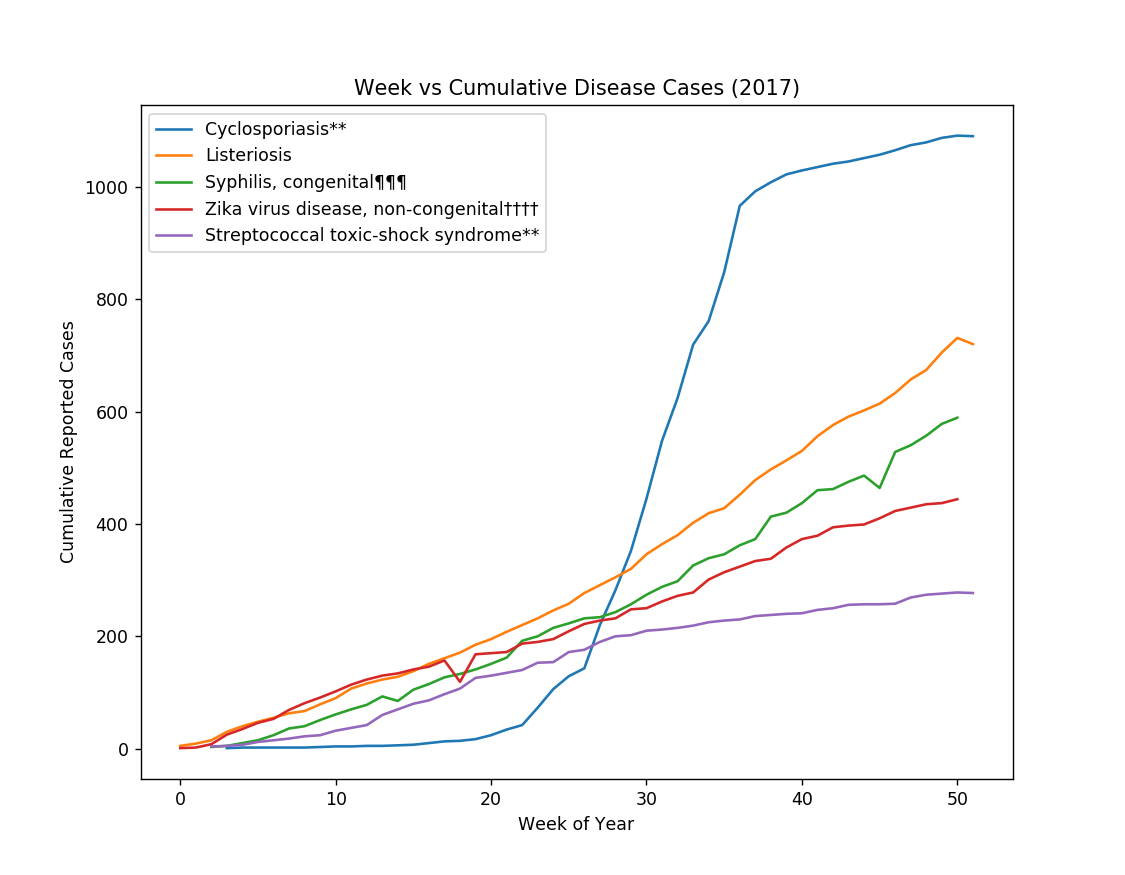

Text(0, 0.5, 'Cumulative Reported Cases')

In [108]:
##################################################################################################################
#
# YouDo: 
#  Make a visualization showing week vs cum_2017 for all of the top 5 diseases
#  
# Strive to make it publication quality. At a minimum, it should have
#   1) Meaningful axis labels with units as appropriate
#   2) An appropriate title
#   2) Legible axis "tick labels"
#   4) A legend that doesn't interfere with
#      the plot
#######################################  BEGIN STUDENT CODE  #####################################################

cuml_counts = df2.groupby("disease").aggregate({"cum_2017":sum}).sort_values("cum_2017",ascending=False).iloc[:5]
# My counts are off by a few here compared to the ones I calculated from the XML?!?!
# Top 5 are still the same though.
print(cuml_counts)

# Get top 5 from index.
top_5_dis = list(cuml_counts.index)
print(top_5_dis)

# Get top 5 data with disease and week as the multiindex
plot_data = df2.set_index(["disease","mmwr_week"])

# Get series for each of them 
series_list = [plot_data.loc[(dis_name,slice(None)),["cum_2017"]] for dis_name in top_5_dis]

figure = plt.figure(figsize=(9,7))
plt.title("Week vs Cumulative Disease Cases (2017)")
for s in series_list:
    plt.plot(s.values)
plt.legend([s.index[0][0] for s in series_list])
plt.xlabel("Week of Year")
plt.ylabel("Cumulative Reported Cases")

# Some of the counts go down? 
#######################################   END STUDENT CODE   #####################################################